In [7]:
%pip install opencv-python

  Using cached opencv_python-4.12.0.88-cp37-abi3-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.2.6-cp311-cp311-win_amd64.whl.metadata (60 kB)
Using cached opencv_python-4.12.0.88-cp37-abi3-win_amd64.whl (39.0 MB)
Using cached numpy-2.2.6-cp311-cp311-win_amd64.whl (12.9 MB)

  Attempting uninstall: numpy

    Found existing installation: numpy 2.3.4

   ---------------------------------------- 0/2 [numpy]
    Uninstalling numpy-2.3.4:
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
      Successfully uninstalled numpy-2.3.4
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ----

  You can safely remove it manually.
  You can safely remove it manually.


In [8]:
from math import log10, sqrt
import cv2
import numpy as np

In [12]:
def PSNR(original, compressed):
    """Calculates the Peak Signal-to-Noise Ratio (PSNR) between two images."""
    
    # Check if images loaded (cv2.imread returns None on failure)
    if original is None or compressed is None:
        print("Error: One or both images failed to load. Check file paths.")
        return 0.0

    # Ensure inputs are NumPy arrays and cast to float for calculation
    # Images must have the same shape.
    mse = np.mean((original.astype(float) - compressed.astype(float)) ** 2)
    
    if(mse == 0):
        return 100.0
        
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

In [ ]:
# --- 1. Define Your File Paths (The originals from your prompt) ---
ori_path = r'D:\GLAZE-evaluation\dataset\Invariance\ori.png'
glz_path = r'D:\GLAZE-evaluation\dataset\Invariance\glz.png'
lora_ori_path = r'D:\GLAZE-evaluation\dataset\Invariance\lora-ori.png'
lora_glz_path = r'D:\GLAZE-evaluation\dataset\Invariance\lora-glz.png'

# --- 2. Load the Images into NumPy Arrays using cv2.imread ---
# cv2.imread loads the image, replacing the role of the strings in the PSNR call.
ori_img = cv2.imread(ori_path)
glz_img = cv2.imread(glz_path)
lora_ori_img = cv2.imread(lora_ori_path)
lora_glz_img = cv2.imread(lora_glz_path)

# --- 3. Calculate and Print PSNR for the three pairs ---
print("--- PSNR Calculations ---")

# ori vs lora_ori
ori_value = PSNR(ori_img, lora_ori_img)
print(f"PSNR (ori vs lora_ori) is {ori_value:.2f} dB")

# ori vs lora_glz
origlz_value = PSNR(ori_img, lora_glz_img)
print(f"PSNR (ori vs lora_glz) is {origlz_value:.2f} dB")

# glz vs lora_glz
glz_value = PSNR(glz_img, lora_glz_img)
print(f"PSNR (glz vs lora_glz) is {glz_value:.2f} dB")

--- PSNR Calculations ---
PSNR (ori vs lora_ori) is 8.62 dB
PSNR (ori vs lora_glz) is 8.92 dB
PSNR (glz vs lora_glz) is 8.92 dB


In [15]:
import matplotlib.pyplot as plt

def plot_psnr_comparison(img1, img2, name1, name2, psnr):
    """Plots two images side-by-side with only the PSNR score."""
    if img1 is None or img2 is None:
        print(f"Skipping plot for {name1} vs {name2} due to missing image data.")
        return 

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    # Convert BGR (OpenCV default) to RGB (Matplotlib default)
    img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

    # Plot Image 1
    axes[0].imshow(img1_rgb)
    axes[0].set_title(f"A: {name1}", fontsize=14)
    axes[0].axis('off')

    # Plot Image 2
    axes[1].imshow(img2_rgb)
    axes[1].set_title(f"B: {name2}", fontsize=14)
    axes[1].axis('off')
    
    # Create the score summary text
    score_text = f"--- PSNR Comparison: {name1} vs {name2} ---\n"
    score_text += f"PSNR Score: {psnr:.2f} dB"
    
    fig.suptitle(score_text, fontsize=16, fontweight='bold', y=0.05)
    
    plt.tight_layout(rect=[0, 0.1, 1, 0.95])
    plt.show()

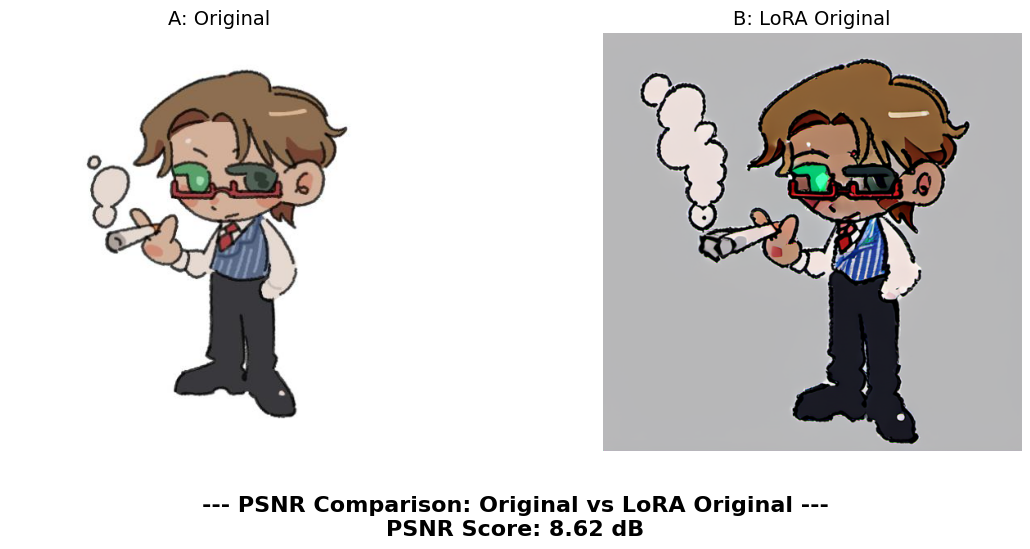

In [16]:
plot_psnr_comparison(ori_img, lora_ori_img, "Original", "LoRA Original", ori_value)

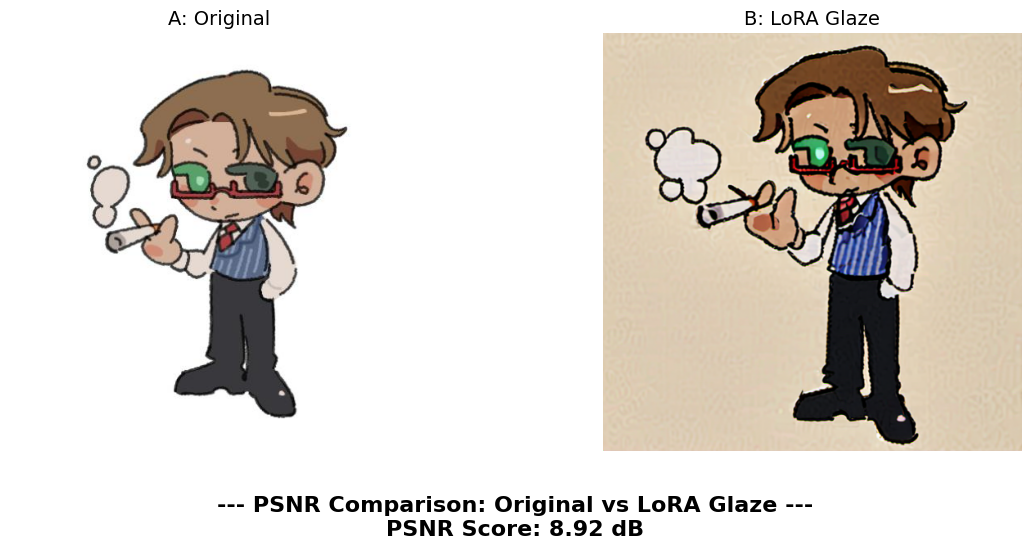

In [19]:
plot_psnr_comparison(ori_img, lora_glz_img, "Original", "LoRA Glaze", origlz_value)

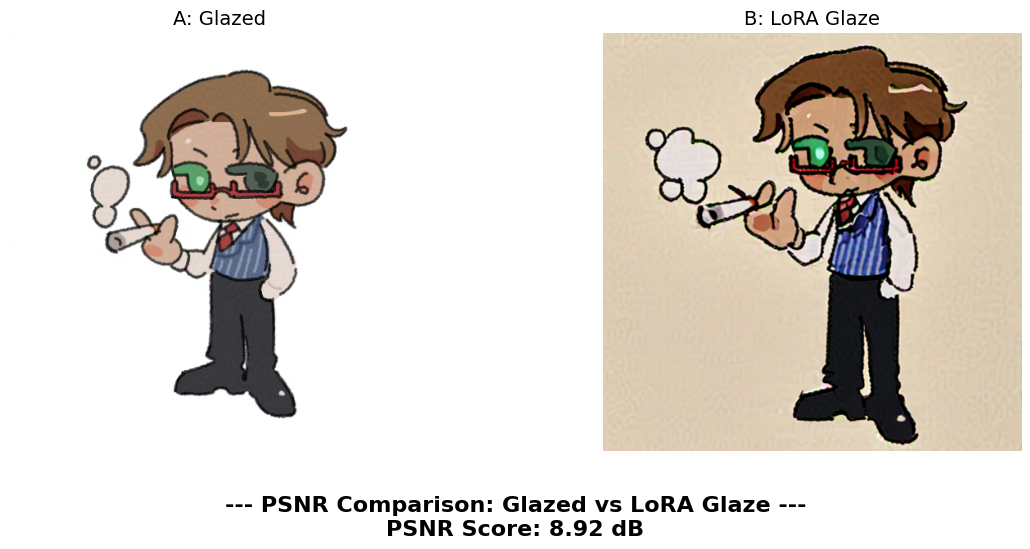

In [18]:
plot_psnr_comparison(glz_img, lora_glz_img, "Glazed", "LoRA Glaze", glz_value)

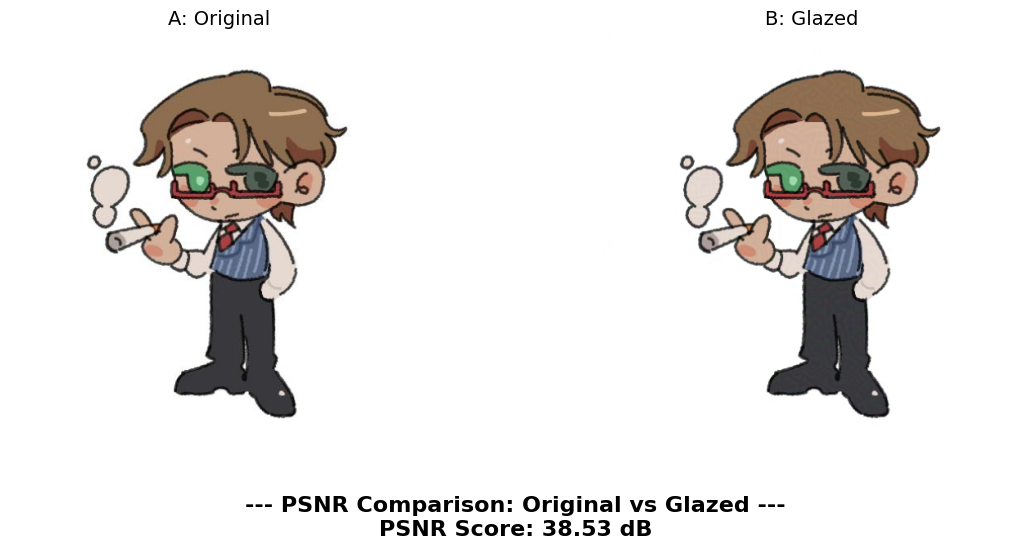

In [20]:
plot_psnr_comparison(ori_img, glz_img, "Original", "Glazed", PSNR(ori_img, glz_img))